In [1]:
# Importing libraries for the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# Creating a variable to hold the csv file
employee_df = pd.read_csv('Employee Attrition compiled.csv')

In [3]:
# looking at the head of the data
employee_df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


In [4]:
# Getting some information about the data
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.2+ MB


In [5]:
# Since the info shows us that some data points are missing, we want to look at the sum of missing values in each column
employee_df.isnull().sum()

Emp ID                   788
satisfaction_level       788
last_evaluation          788
number_project           788
average_montly_hours     788
time_spend_company       788
Work_accident            788
promotion_last_5years    788
dept                     788
salary                   788
dtype: int64

In [6]:
missing = employee_df.loc[employee_df['Emp ID'].isnull()]
missing

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
12783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
13566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [7]:
employee_df.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [9]:
# Id's are special identifiers that we cannot perform operations on so we'll drop datapoints with missing IDs
# And it was observed that most IDs that are missing actually did not fill the data
employee_df = employee_df.dropna(subset=['Emp ID'])

In [17]:
# Checking for duplicated rows and columns
employee_df.loc[employee_df.duplicated(subset=['Emp ID'])]

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary


In [20]:
# changing the Employee Id to a String since We will not perform statistical calculations on them
employee_df['Emp ID'] = employee_df['Emp ID'].astype(str)

Since there are no ID's duplicated, we can say that there are no duplicated values in the data.
And also since the data is clean, we can proceed to exploring the data

## Exploratory Analysis

In [21]:
# Getting the statistical summaries of the Quantitative variables
employee_df.describe(exclude=object)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [23]:
# Getting the statistical summaries of the Categorical Variables
employee_df.describe(exclude=['float64', 'int64'])

,Emp ID,dept,salary
count,14999,14999,14999
unique,14999,10,3
top,838.0,sales,low
freq,1,4140,7316


## 2. Visualisations

## Using Box plots to determine outliers in the data

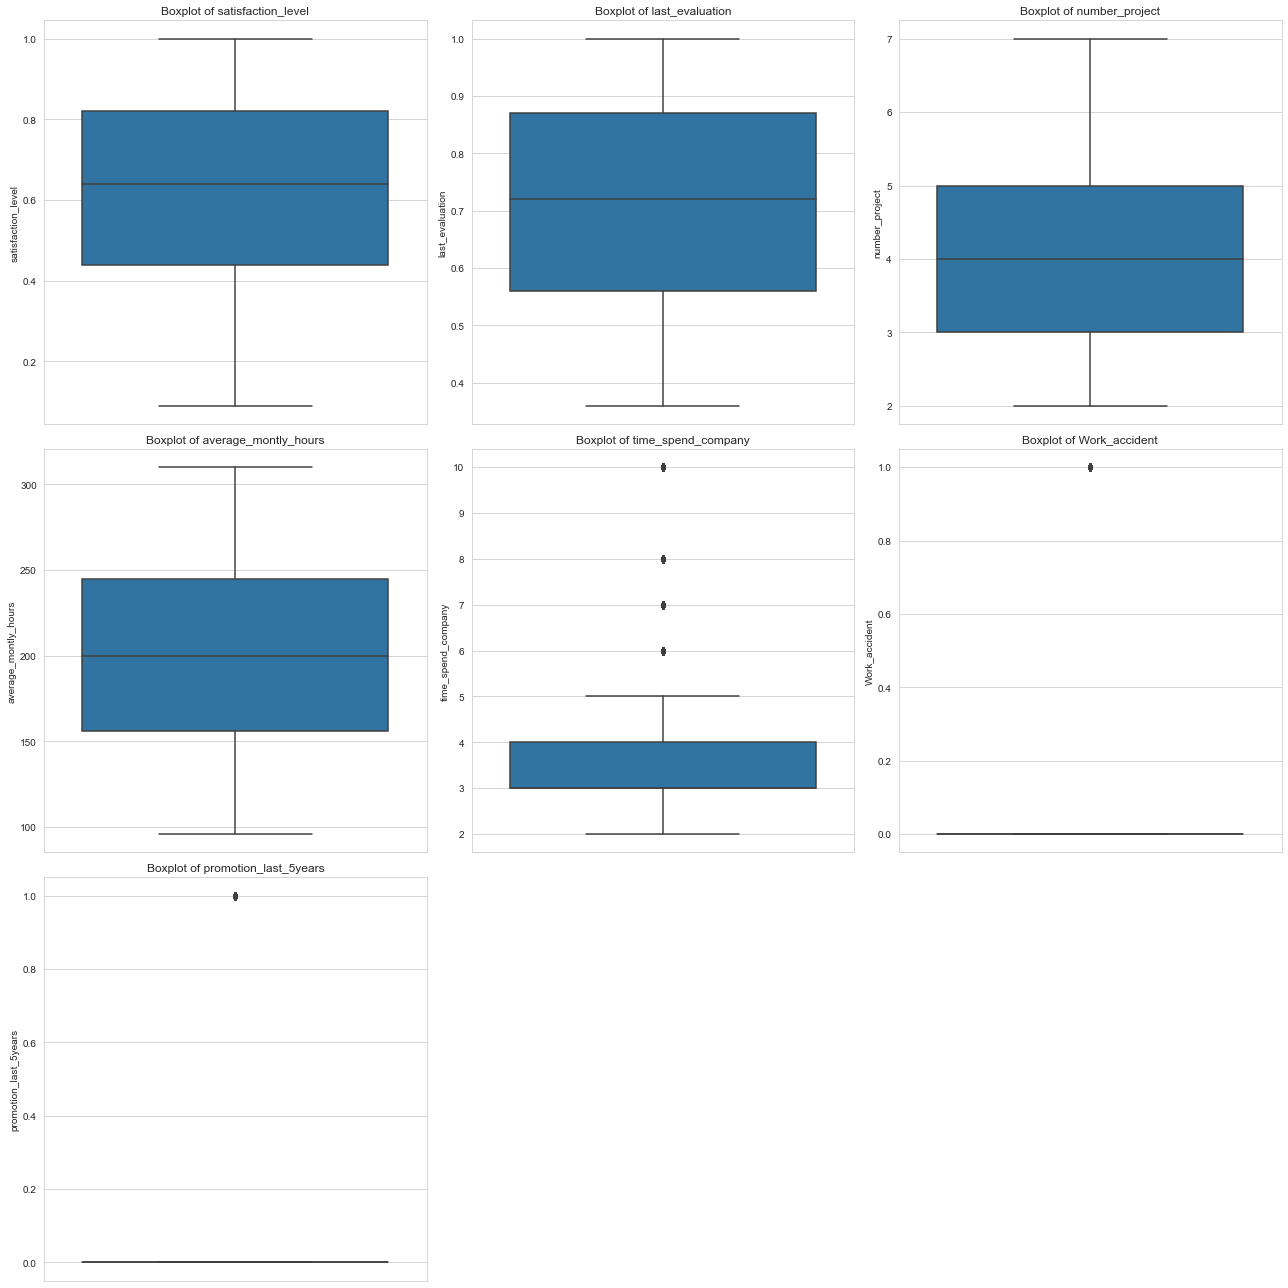

In [32]:
# Using Box plots to determine outliers in the data
# Selecting all Quantitative Variables
quantitative_vars = employee_df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(18, 18))

# Iterate over each quantitative variable and create boxplots
for col in quantitative_vars.columns:
    plt.subplot(3, 3, quantitative_vars.columns.get_loc(col) + 1)
    sns.boxplot(data=employee_df, y=col)
    plt.title("Boxplot of {}".format(col))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


### Interpretation of the graph
1. The first four variables in the data seem to have no apparent outlier
2. Time spent by employees in the company has an outlier ranging from 6 to 10

## visualising The Categorical Variables

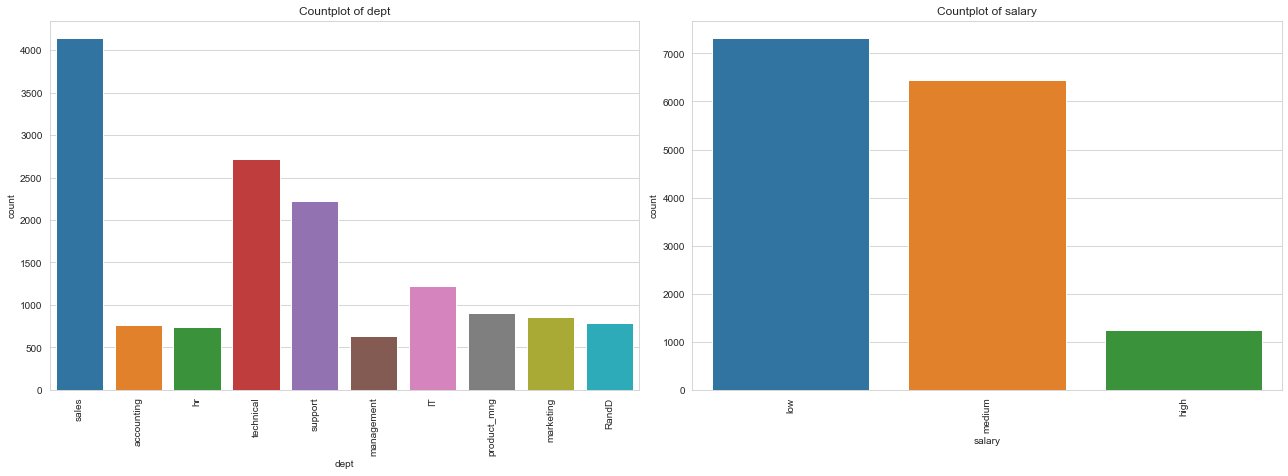

In [36]:
# Selecting all Categorical varibles
categorical_vars = employee_df.select_dtypes(include='object')
#Remove the Id since we do not need it
categorical_vars = categorical_vars.drop(columns='Emp ID', axis = 1)

# Set the figure size and style
plt.figure(figsize=(18, 12))

# Iterate over each categorical variable and create countplots
for col in categorical_vars.columns:
    plt.subplot(2, 2, categorical_vars.columns.get_loc(col) + 1)
    sns.countplot(data=employee_df, x=col)
    plt.title("Countplot of {}".format(col))
    plt.xticks(rotation=90)
# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


## Visualising the Relationship among the Variables

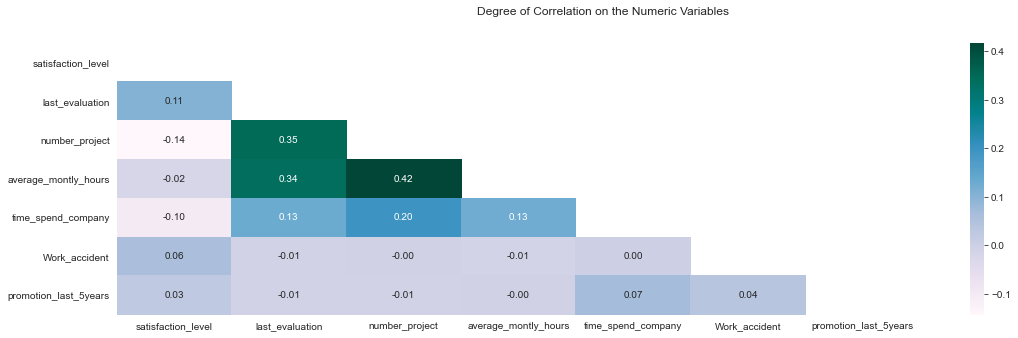

In [39]:
corr = employee_df.corr()
plt.figure(figsize=(18, 5))
sns.heatmap(corr, annot=True, fmt=".2f", mask=np.triu(np.ones_like(employee_df.corr(), dtype=bool)), cmap='PuBuGn')
plt.suptitle('Degree of Correlation on the Numeric Variables')
plt.show()